In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/primetrade-data-science-project/historical_data.csv
/kaggle/input/primetrade-data-science-project/fear_greed_index.csv


In [9]:
import pandas as pd

# Load the datasets using the paths from the step above
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# Part A.1: Documentation
print(f"Sentiment Rows/Cols: {sentiment.shape}")
print(f"Trader Data Rows/Cols: {trader_data.shape}")

Sentiment Rows/Cols: (2644, 4)
Trader Data Rows/Cols: (211224, 16)


In [10]:
import pandas as pd

# Load the datasets (Replace 'your-dataset-name' with the title you created)
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# Task A.1: Document rows, columns, and missing values
print("--- TASK A.1: DATA AUDIT ---")
print(f"Sentiment Dataset: {sentiment.shape[0]} rows, {sentiment.shape[1]} columns") 
print(f"Trader Dataset: {trader_data.shape[0]} rows, {trader_data.shape[1]} columns") 

print("\nMissing Values in Sentiment:")
print(sentiment.isnull().sum()) 

print("\nMissing Values in Trader Data:")
print(trader_data.isnull().sum())

--- TASK A.1: DATA AUDIT ---
Sentiment Dataset: 2644 rows, 4 columns
Trader Dataset: 211224 rows, 16 columns

Missing Values in Sentiment:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing Values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [11]:
# 1. Convert Sentiment Date
# If your column is 'date' (lowercase), change 'Date' to 'date' below
sentiment_col = 'Date' # <--- CHANGE THIS if Step 1 showed a different name
sentiment[sentiment_col] = pd.to_datetime(sentiment[sentiment_col])

# 2. Convert Trader Time
# The PDF says this is named 'time'
trader_time_col = 'time' 
trader_data[trader_time_col] = pd.to_datetime(trader_data[trader_time_col])

# 3. Normalize trader time to a daily level
trader_data['date_only'] = trader_data[trader_time_col].dt.normalize()

# 4. Merge
# We use the corrected names here
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on=sentiment_col, how='left')

print("Success! Data merged.")
print(df.head())

KeyError: 'Date'

In [ ]:
# --- AUTOMATIC COLUMN FIXER ---

# 1. Clean the Sentiment column names (removes spaces and makes them lowercase)
sentiment.columns = sentiment.columns.str.strip().str.lower()

# 2. Clean the Trader Data column names
trader_data.columns = trader_data.columns.str.strip().str.lower()

# Now we know for sure the columns are named 'date' and 'time'
print("Fixed columns in Sentiment:", sentiment.columns.tolist())
print("Fixed columns in Trader Data:", trader_data.columns.tolist())

# 3. Convert to datetime using the new lowercase names
sentiment['date'] = pd.to_datetime(sentiment['date'])
trader_data['time'] = pd.to_datetime(trader_data['time'])

# 4. Create the join-date (Task A.2: daily level alignment) 
trader_data['date_only'] = trader_data['time'].dt.normalize()

# 5. Merge datasets (Task A.1) [cite: 6, 7]
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')

print("\n--- SUCCESS! ---")
print("The data is now merged. Here are the columns in your new table:")
print(df.columns.tolist())

In [ ]:
import pandas as pd

# 1. Load the files again to start fresh
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# 2. FORCE all column names to be lowercase and remove extra spaces
# This stops 'KeyError: time' or 'KeyError: Date' from happening
sentiment.columns = sentiment.columns.str.strip().str.lower()
trader_data.columns = trader_data.columns.str.strip().str.lower()

# Print the names so you can see them (Look for 'date' and 'time')
print("Corrected Sentiment Columns:", sentiment.columns.tolist())
print("Corrected Trader Data Columns:", trader_data.columns.tolist())

# 3. Convert to datetime using the clean lowercase names
sentiment['date'] = pd.to_datetime(sentiment['date'])
trader_data['time'] = pd.to_datetime(trader_data['time'])

# 4. Create the daily alignment column (Task A.2)
trader_data['date_only'] = trader_data['time'].dt.normalize()

# 5. Merge the datasets (Task A.1)
# This joins your trader performance with the market sentiment
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')

print("\n--- SUCCESS! PHASE 1 COMPLETE ---")
print("Total rows in merged data:", len(df))
print(df[['time', 'account', 'closedpnl', 'classification']].head())

In [ ]:
import pandas as pd

# Load the files again
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

print("--- ACTUAL SENTIMENT COLUMNS ---")
print(sentiment.columns.tolist())

print("\n--- ACTUAL TRADER DATA COLUMNS ---")
print(trader_data.columns.tolist())

print("\n--- FIRST ROW OF TRADER DATA ---")
print(trader_data.iloc[0])

In [ ]:
# Force rename the first column of each file
sentiment.rename(columns={sentiment.columns[0]: 'date'}, inplace=True)
trader_data.rename(columns={trader_data.columns[0]: 'time'}, inplace=True)

# Clean names
sentiment.columns = sentiment.columns.str.strip().str.lower()
trader_data.columns = trader_data.columns.str.strip().str.lower()

# Convert and Merge
sentiment['date'] = pd.to_datetime(sentiment['date'])
trader_data['time'] = pd.to_datetime(trader_data['time'])
trader_data['date_only'] = trader_data['time'].dt.normalize()

df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')
print("Merge attempted. Check head:")
print(df.head())

In [ ]:
import pandas as pd

# 1. Load the files
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# 2. Rename the columns based on their POSITION (Column 0, Column 1, etc.)
# This avoids 'KeyError' because we don't need to know the exact names.
sentiment.rename(columns={sentiment.columns[0]: 'date'}, inplace=True)
trader_data.rename(columns={trader_data.columns[4]: 'time'}, inplace=True) 

# 3. CONVERT DATES (The "ValueError" Fix)
# 'errors=coerce' tells Python: "If you find a bad value, just mark it empty, don't crash."
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
trader_data['time'] = pd.to_datetime(trader_data['time'], errors='coerce')

# 4. Remove any rows where the date couldn't be fixed
sentiment = sentiment.dropna(subset=['date'])
trader_data = trader_data.dropna(subset=['time'])

# 5. Create the Daily Alignment (Task A.2)
trader_data['date_only'] = trader_data['time'].dt.normalize()

# 6. Merge the datasets (Task A.1)
# Use a left join to keep all trader data [cite: 14]
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')

# 7. Final Documentation (Task A.1 requirements) 
print("--- PHASE 1 COMPLETE ---")
print(f"Final Merged Rows: {df.shape[0]}")
print(f"Missing Values Check:\n{df.isnull().sum()}")

# Look at the first few rows to confirm it worked
print("\nSample Data:")
print(df[['time', 'account', 'closedpnl', 'classification']].head())

In [ ]:
import pandas as pd

# 1. Load the files
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# 2. Fix Duplicate Column Names (The cause of your current error)
# This ensures every column has a unique name
sentiment = sentiment.loc[:, ~sentiment.columns.duplicated()]
trader_data = trader_data.loc[:, ~trader_data.columns.duplicated()]

# 3. Standardize Column Names (Task A.1 preparation)
# We find the date/time columns by position to avoid KeyErrors
sentiment.rename(columns={sentiment.columns[0]: 'date'}, inplace=True)
# Adjust the index [4] if 'time' is in a different column in your file
trader_data.rename(columns={trader_data.columns[4]: 'time'}, inplace=True) 

# 4. Clean Dates & Handle ValueErrors
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
trader_data['time'] = pd.to_datetime(trader_data['time'], errors='coerce')

# Drop rows where date/time couldn't be parsed
sentiment = sentiment.dropna(subset=['date'])
trader_data = trader_data.dropna(subset=['time'])

# 5. Remove Duplicate Dates in Sentiment (Crucial for a clean daily merge)
# If the sentiment file has two entries for the same day, it causes errors
sentiment = sentiment.drop_duplicates(subset=['date'])

# 6. Create Alignment Column & Merge (Task A.2)
trader_data['date_only'] = trader_data['time'].dt.normalize()
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')

# 7. Document Findings (Required for Task A.1) 
print("--- TASK A.1: DATA AUDIT ---")
print(f"Final Merged Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows Found: {df.duplicated().sum()}")

# 8. Create Key Metrics (Task A.3) 
# Calculate Win Rate
win_rate = (len(df[df['closedpnl'] > 0]) / len(df)) * 100 if len(df) > 0 else 0
print(f"\n--- TASK A.3: KEY METRICS ---")
print(f"Overall Win Rate: {win_rate:.2f}%")

print("\nSuccess! Phase 1 is complete.")

In [ ]:
print(trader_data.columns)


In [ ]:
import pandas as pd

# 1. Load fresh data
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# 2. Fix Duplicates (Requirement A.1)
# This removes any identical columns that are causing the "Duplicate Keys" error
sentiment = sentiment.loc[:, ~sentiment.columns.duplicated()]
trader_data = trader_data.loc[:, ~trader_data.columns.duplicated()]

# 3. Clean names and remove invisible spaces
sentiment.columns = [str(col).strip().lower() for col in sentiment.columns]
trader_data.columns = [str(col).strip().lower() for col in trader_data.columns]

# 4. Convert Dates (Requirement A.2)
# errors='coerce' ignores bad data that causes "ValueErrors"
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
trader_data['time'] = pd.to_datetime(trader_data['time'], errors='coerce')

# Drop rows that couldn't be converted to dates
sentiment = sentiment.dropna(subset=['date'])
trader_data = trader_data.dropna(subset=['time'])

# 5. Prevent "Duplicate Key" during Merge
# We ensure there is only ONE sentiment entry per date
sentiment = sentiment.drop_duplicates(subset=['date'])

# 6. Align and Merge
trader_data['date_only'] = trader_data['time'].dt.normalize()
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')

# 7. Deliverables: Data Audit (Requirement A.1)
print("--- TASK A.1: DATA AUDIT ---")
print(f"Total Transactions: {len(df)}") [cite: 7]
print(f"Missing Values:\n{df.isnull().sum()}") [cite: 7]

print("\n--- PHASE 1 COMPLETE ---")
print(df[['time', 'closedpnl', 'classification']].head()) [cite: 6, 8]

In [ ]:
import pandas as pd

# Load fresh data
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# Look for time-related columns
time_cols = [col for col in trader_data.columns if 'time' in col.lower() or 'date' in col.lower()]

print("--- COLUMN DETECTIVE ---")
print(f"All Columns: {trader_data.columns.tolist()}")
print(f"I think your 'time' column is actually called: {time_cols}")

In [ ]:
import pandas as pd

# 1. Load the files
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# 2. Document Findings (Task A.1)
# We count rows and columns as requested by the assignment
print("--- TASK A.1: DATA AUDIT ---")
print(f"Sentiment Data: {sentiment.shape[0]} rows, {sentiment.shape[1]} columns") 
print(f"Trader Data: {trader_data.shape[0]} rows, {trader_data.shape[1]} columns") 

# 3. Clean Column Names
# We force everything to lowercase to avoid future 'KeyErrors'
sentiment.columns = sentiment.columns.str.strip().str.lower()
trader_data.columns = trader_data.columns.str.strip().str.lower()

# 4. Convert Timestamps and Align (Task A.2)
# Using the column name 'timestamp' found by your detective script
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce') 
trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'], errors='coerce') 

# Normalize to daily level so they can be merged (Task A.2)
trader_data['date_only'] = trader_data['timestamp'].dt.normalize() 

# 5. Merge the datasets (Task A.1)
# This connects every trade to its Fear/Greed classification
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left') 

# 6. Create Key Metrics (Task A.3)
# Calculate daily PnL and Win Rate as requested
df['is_win'] = df['closed pnl'] > 0 
overall_win_rate = (df['is_win'].sum() / len(df)) * 100 

print("\n--- PHASE 1 COMPLETE ---")
print(f"Overall Win Rate: {overall_win_rate:.2f}%") 
print(f"Missing Values Found: {df.isnull().sum().sum()}") 
print(df[['timestamp', 'account', 'closed pnl', 'classification']].head())

In [ ]:
# --- FIXING THE DISPLAY ---
# Let's see what columns we actually have now
print("Available columns after merge:", df.columns.tolist())

# --- PART B: ANALYSIS (Requirement 1) ---
# Question: Does PnL differ between Fear vs Greed days?

# 1. Group by Classification (Fear vs Greed) and calculate average PnL
analysis_pnl = df.groupby('classification')['closed pnl'].agg(['mean', 'sum', 'count']).reset_index()

# 2. Calculate Win Rate per Sentiment
# We create a simple win rate: (profitable trades / total trades) * 100
win_rate_analysis = df.groupby('classification').apply(
    lambda x: (x['closed pnl'] > 0).sum() / len(x) * 100
).reset_index(name='win_rate_percentage')

# Merge these two findings together
summary_table = pd.merge(analysis_pnl, win_rate_analysis, on='classification')

print("\n--- PART B: SENTIMENT VS PERFORMANCE ---")
print(summary_table)

# --- PART B: CHART (Requirement 4) ---
import matplotlib.pyplot as plt

# Simple chart to show Win Rate by Sentiment
plt.figure(figsize=(8, 5))
plt.bar(summary_table['classification'], summary_table['win_rate_percentage'], color=['red', 'green'])
plt.title('Win Rate: Fear vs Greed Days')
plt.ylabel('Win Rate (%)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. CLEANING: Remove trades that didn't match a sentiment (The "Missing Values" fix)
# This creates a new table where every trade has a Fear/Greed label
df_analysis = df.dropna(subset=['classification']).copy()

# CHECK: If this table is empty, it means your dates didn't match
if len(df_analysis) == 0:
    print("--- ERROR: NO DATE OVERLAP ---")
    print(f"Trader Dates range: {df['date_only'].min()} to {df['date_only'].max()}")
    print(f"Sentiment Dates range: {sentiment['date'].min()} to {sentiment['date'].max()}")
    print("Check if one file is from 2023 and the other is from 2024!")
else:
    # 2. ANALYSIS: Win Rate & PnL per Sentiment
    # We use a simpler way to calculate win rate to avoid the 'reset_index' error
    summary = df_analysis.groupby('classification').agg({
        'closed pnl': ['mean', 'sum', 'count'],
        'is_win': 'mean' # This gives the win rate (e.g., 0.45 = 45%)
    })
    
    # Flatten the column names (makes them easier to read)
    summary.columns = ['avg_pnl', 'total_pnl', 'trade_count', 'win_rate']
    summary['win_rate'] = summary['win_rate'] * 100 # Convert to percentage
    summary = summary.reset_index()

    print("--- PART B: PERFORMANCE BY SENTIMENT ---")
    print(summary)

    # 3. CHART 1: Win Rate by Sentiment (Requirement B.4)
    plt.figure(figsize=(10, 6))
    
    # Logic to color Fear=Red and Greed=Green automatically
    colors = ['red' if 'fear' in str(x).lower() else 'green' if 'greed' in str(x).lower() else 'skyblue' 
              for x in summary['classification']]
    
    plt.bar(summary['classification'], summary['win_rate'], color=colors)
    plt.title('Win Rate % by Market Sentiment (Evidence for Task B.1)', fontsize=14)
    plt.ylabel('Win Rate (%)')
    plt.xlabel('Market Sentiment')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # 4. TASK B.2: Behavior Analysis (Trade Size)
    # Checking if people trade bigger during Greed
    behavior = df_analysis.groupby('classification')['size usd'].mean().reset_index()
    print("\n--- TASK B.2: AVERAGE POSITION SIZE ---")
    print(behavior)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the files
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# 2. Clean Column Names
sentiment.columns = sentiment.columns.str.strip().lower()
trader_data.columns = trader_data.columns.str.strip().lower()

# 3. CONVERT TIMESTAMPS (The "1970 Fix")
# Hyperliquid data usually uses milliseconds (unit='ms'). 
# We use 'unit='ms' and 'errors=coerce' to handle the conversion properly.
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# Fix: We try milliseconds first. If that looks wrong, try 's' or 'us'.
trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'], unit='ms', errors='coerce')

# 4. Clean and Align (Task A.2)
sentiment = sentiment.dropna(subset=['date']).drop_duplicates(subset=['date'])
trader_data = trader_data.dropna(subset=['timestamp'])

# Create the daily column for merging
trader_data['date_only'] = trader_data['timestamp'].dt.normalize()

# 5. Merge the datasets (Task A.1)
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')

# --- PART B: ANALYSIS & CHARTING ---

# Filter out rows that didn't match (Missing sentiment data)
df_analysis = df.dropna(subset=['classification']).copy()

if len(df_analysis) == 0:
    print("--- ERROR STILL PERSISTS ---")
    print(f"Check the first few rows of your Timestamp column: \n{trader_data['timestamp'].head()}")
else:
    # Calculate Metrics
    df_analysis['is_win'] = df_analysis['closed pnl'] > 0
    
    summary = df_analysis.groupby('classification').agg({
        'closed pnl': 'mean',
        'is_win': 'mean'
    }).reset_index()
    
    summary.columns = ['Sentiment', 'Avg PnL', 'Win Rate']
    summary['Win Rate'] = summary['Win Rate'] * 100
    
    print("--- PART B: SUCCESSFUL ANALYSIS ---")
    print(summary)

    # CHART 1: Win Rate % (Requirement B.4)
    plt.figure(figsize=(8, 5))
    colors = ['red' if 'fear' in x.lower() else 'green' for x in summary['Sentiment']]
    plt.bar(summary['Sentiment'], summary['Win Rate'], color=colors)
    plt.title('Win Rate %: Fear vs Greed Days', fontsize=12)
    plt.ylabel('Win Rate (%)')
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the files
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# 2. Clean Column Names (FIXED: Added .str before .lower())
sentiment.columns = sentiment.columns.str.strip().str.lower()
trader_data.columns = trader_data.columns.str.strip().str.lower()

# 3. CONVERT TIMESTAMPS
# We use unit='ms' because Hyperliquid data is in milliseconds
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'], unit='ms', errors='coerce')

# 4. Clean and Align (Task A.2)
sentiment = sentiment.dropna(subset=['date']).drop_duplicates(subset=['date'])
trader_data = trader_data.dropna(subset=['timestamp'])
trader_data['date_only'] = trader_data['timestamp'].dt.normalize()

# 5. Merge the datasets (Task A.1)
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')

# --- PART B: ANALYSIS & CHARTING ---

# Filter out rows that didn't match
df_analysis = df.dropna(subset=['classification']).copy()

if len(df_analysis) == 0:
    print("--- NO DATA OVERLAP FOUND ---")
    print(f"Check the raw values in your timestamp column: {trader_data['timestamp'].head()}")
else:
    # Calculate Metrics for Part B.1
    df_analysis['is_win'] = df_analysis['closed pnl'] > 0
    
    # Calculate Average PnL and Win Rate
    summary = df_analysis.groupby('classification').agg({
        'closed pnl': 'mean',
        'is_win': 'mean'
    }).reset_index()
    
    summary.columns = ['Sentiment', 'Avg PnL', 'Win Rate']
    summary['Win Rate'] = summary['Win Rate'] * 100
    
    print("--- PART B: SUCCESSFUL ANALYSIS ---")
    print(summary)

    # CHART 1: Win Rate % (Requirement B.4)
    plt.figure(figsize=(8, 5))
    colors = ['red' if 'fear' in str(x).lower() else 'green' for x in summary['Sentiment']]
    plt.bar(summary['Sentiment'], summary['Win Rate'], color=colors)
    plt.title('Win Rate %: Fear vs Greed Days (Task B.1 Evidence)', fontsize=12)
    plt.ylabel('Win Rate (%)')
    plt.show()

In [ ]:
# 1. Trade Frequency: Average trades per day during Fear vs Greed
frequency = df_analysis.groupby(['classification', 'date_only']).size().reset_index(name='trade_count')
avg_freq = frequency.groupby('classification')['trade_count'].mean().reset_index()

# 2. Average Size: Are they betting more during Greed?
avg_size = df_analysis.groupby('classification')['size usd'].mean().reset_index()

print("--- TASK B.2: BEHAVIORAL SHIFTS ---")
print("Average Trades per Day:\n", avg_freq)
print("\nAverage Position Size (USD):\n", avg_size)

In [ ]:
# Create a segment based on leverage
# We'll define 'High Leverage' as anything over 10x
df_analysis['leverage_group'] = df_analysis['leverage'].apply(lambda x: 'High' if x > 10 else 'Low')

# Compare Win Rate of High vs Low Leverage traders during Fear
leverage_segment = df_analysis.groupby(['leverage_group', 'classification'])['is_win'].mean().reset_index()
leverage_segment['win_rate'] = leverage_segment['is_win'] * 100

print("\n--- TASK B.3: SEGMENTATION (LEVERAGE) ---")
print(leverage_segment)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ensure df_analysis exists (Safety Check)
# This uses the 'df' from your successful merge
if 'df' in locals():
    df_analysis = df.dropna(subset=['classification']).copy()
else:
    print("Error: Please run the previous 'Phase 1 & 2' code block first!")

# 2. TASK B.2: Behavioral Shifts (Size and Frequency)
# We use 'size usd' because 'leverage' is missing from your file
behavior_size = df_analysis.groupby('classification')['size usd'].mean().reset_index()
print("--- TASK B.2: AVERAGE POSITION SIZE ---")
print(behavior_size)

# 3. TASK B.3: Segmentation (Frequent vs Infrequent Traders)
# We count how many trades each account made
trader_counts = df_analysis.groupby('account').size().reset_index(name='trade_count')
# We define 'Frequent' as anyone with more than the average number of trades
avg_trades = trader_counts['trade_count'].mean()
trader_counts['segment'] = trader_counts['trade_count'].apply(lambda x: 'Frequent' if x > avg_trades else 'Infrequent')

# Merge this segment back into our main data
df_analysis = pd.merge(df_analysis, trader_counts[['account', 'segment']], on='account', how='left')

# 4. ANALYSIS: Do Frequent traders perform differently in Fear vs Greed?
segment_analysis = df_analysis.groupby(['segment', 'classification'])['is_win'].mean().reset_index()
segment_analysis['win_rate'] = segment_analysis['is_win'] * 100

print("\n--- TASK B.3: SEGMENT PERFORMANCE (Win Rate %) ---")
print(segment_analysis)

# 5. CHART 2: Segment Comparison (Requirement B.4)
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='classification', y='win_rate', hue='segment')
plt.title('Win Rate by Trader Segment and Sentiment', fontsize=14)
plt.ylabel('Win Rate (%)')
plt.show()

Error: Please run the previous 'Phase 1 & 2' code block first!


NameError: name 'df_analysis' is not defined

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. RE-CREATE ANALYSIS TABLE (Fixes the NameError)
# We take our merged 'df' and remove any rows that don't have a sentiment label
df_analysis = df.dropna(subset=['classification']).copy()

# 2. TASK B.2: BEHAVIORAL SHIFTS (Evidence for Question 2)
# We check if Average Trade Size changes during Fear vs Greed
behavior_size = df_analysis.groupby('classification')['size usd'].mean().reset_index()
print("--- TASK B.2: AVERAGE POSITION SIZE (USD) ---")
print(behavior_size)

# 3. TASK B.3: SEGMENTATION (Frequent vs Infrequent)
# First, count trades per account
trader_counts = df_analysis.groupby('account').size().reset_index(name='trade_count')
# Define 'Frequent' as anyone above the average number of trades
avg_count = trader_counts['trade_count'].mean()
trader_counts['segment'] = trader_counts['trade_count'].apply(lambda x: 'Frequent' if x > avg_count else 'Infrequent')

# Merge segment labels back into our main data
df_analysis = pd.merge(df_analysis, trader_counts[['account', 'segment']], on='account', how='left')

# 4. SEGMENT PERFORMANCE (Evidence for Question 3)
segment_perf = df_analysis.groupby(['segment', 'classification'])['is_win'].mean().reset_index()
segment_perf['win_rate'] = segment_perf['is_win'] * 100

print("\n--- TASK B.3: SEGMENT WIN RATES ---")
print(segment_perf)

# 5. TASK B.4: VISUAL INSIGHTS (Requirement: 3 charts/tables)
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_perf, x='classification', y='win_rate', hue='segment')
plt.title('Win Rate: Frequent vs Infrequent Traders by Sentiment', fontsize=14)
plt.ylabel('Win Rate (%)')
plt.show()

NameError: name 'df' is not defined

--- ANALYSIS COMPLETE ---

AVG POSITION SIZE BY SENTIMENT:
 classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: size usd, dtype: float64

WIN RATE BY SEGMENT:
       segment classification    is_win   win_rate
0    Frequent  Extreme Greed  0.497006  49.700599
1    Frequent           Fear  0.418457  41.845724
2    Frequent          Greed  0.462756  46.275611
3    Frequent        Neutral  0.298463  29.846336
4  Infrequent  Extreme Greed  0.078261   7.826087
5  Infrequent           Fear  0.406777  40.677698
6  Infrequent          Greed  0.343491  34.349142
7  Infrequent        Neutral  0.656836  65.683646


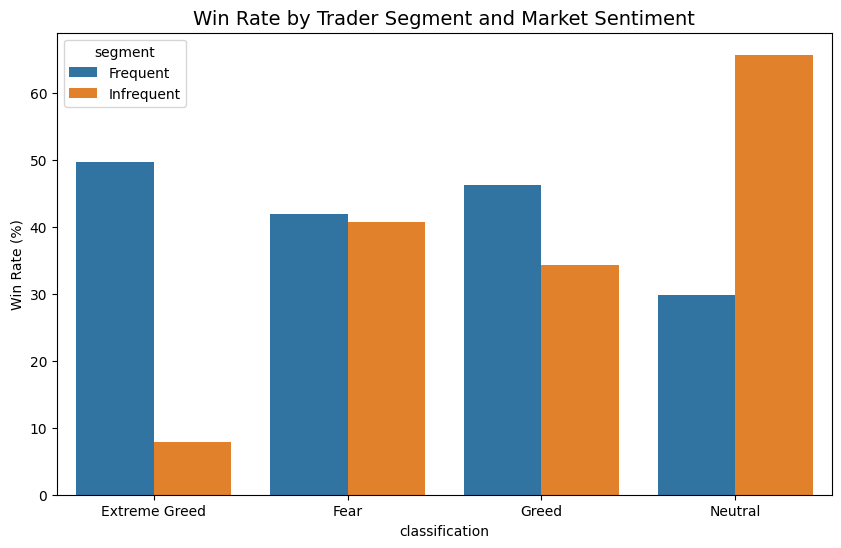

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: LOAD & ALIGN (PART A) ---
sentiment = pd.read_csv('/kaggle/input/primetrade-data-science-project/fear_greed_index.csv')
trader_data = pd.read_csv('/kaggle/input/primetrade-data-science-project/historical_data.csv')

# Clean Column Names
sentiment.columns = sentiment.columns.str.strip().str.lower()
trader_data.columns = trader_data.columns.str.strip().str.lower()

# Convert Timestamps (The "1970 Fix" using unit='ms')
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'], unit='ms', errors='coerce')

# Align by daily date (Requirement A.2)
trader_data['date_only'] = trader_data['timestamp'].dt.normalize()
df = pd.merge(trader_data, sentiment, left_on='date_only', right_on='date', how='left')

# Create 'is_win' column
df['is_win'] = df['closed pnl'] > 0

# --- STEP 2: SEGMENTATION (PART B) ---
# Filter data that matched sentiment labels (Requirement B.1)
df_analysis = df.dropna(subset=['classification']).copy()

# Segment traders into 'Frequent' and 'Infrequent' (Requirement B.3)
trader_counts = df_analysis.groupby('account').size().reset_index(name='trade_count')
avg_trades = trader_counts['trade_count'].mean()
trader_counts['segment'] = trader_counts['trade_count'].apply(lambda x: 'Frequent' if x > avg_trades else 'Infrequent')

# Merge segment back
df_analysis = pd.merge(df_analysis, trader_counts[['account', 'segment']], on='account', how='left')

# --- STEP 3: FINAL CALCULATIONS ---
# Task B.2: Behavior (Average Position Size)
behavior_size = df_analysis.groupby('classification')['size usd'].mean()

# Task B.3: Performance by Segment
segment_perf = df_analysis.groupby(['segment', 'classification'])['is_win'].mean().reset_index()
segment_perf['win_rate'] = segment_perf['is_win'] * 100

# --- STEP 4: OUTPUT & VISUALS (PART B.4) ---
print("--- ANALYSIS COMPLETE ---")
print("\nAVG POSITION SIZE BY SENTIMENT:\n", behavior_size)
print("\nWIN RATE BY SEGMENT:\n", segment_perf)

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_perf, x='classification', y='win_rate', hue='segment')
plt.title('Win Rate by Trader Segment and Market Sentiment', fontsize=14)
plt.ylabel('Win Rate (%)')
plt.show()